# Generate Random Numbers

First let us import the necessary libraries

In [43]:
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sb
import pandas as pd
import random

We will define a function for generating random numbers as an opening example

In [6]:
def gen_random(n: int, d: int, covar: float) -> np.ndarray:
    cov_mat = np.ones((d, d)) * covar; np.fill_diagonal(cov_mat, 1)
    offset = np.zeros(d)

    return np.random.multivariate_normal(offset, cov_mat, size=n)

We construct two data sets each with two variables. The datasets are A and B, where A contains two independent random standard normal variables and B contains two independent uniformly distributed variables.

In [122]:
rng = np.random.default_rng(seed=1234)
x1a = rng.normal(size=100)
x2a = rng.normal(size=100)
xa = pd.DataFrame(x1a,x2a)

x1b = np.random.uniform(0,1,100)
x2b = np.random.uniform(0,1,100)
xb = pd.DataFrame(x1b,x2b)

We may now construct a scatter plot of the normally distributed dataset

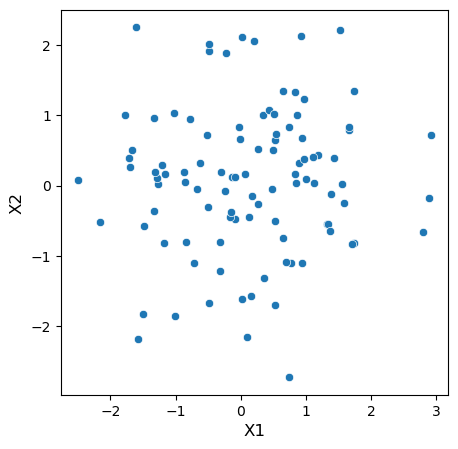

In [50]:
fig, ax = plt.subplots(figsize = ( 5 , 5 )) 
  
# Plot the scatterplot 
sb.scatterplot( ax = ax , x = x1a , y = x2a , data = xa ) 
  
# Set label for x-axis 
ax.set_xlabel( "X1" , size = 12 ) 
  
# Set label for y-axis 
ax.set_ylabel( "X2" , size = 12 ) 
  
# Display figure 
plt.show() 

Then we construct a scatter plot for the uniform data

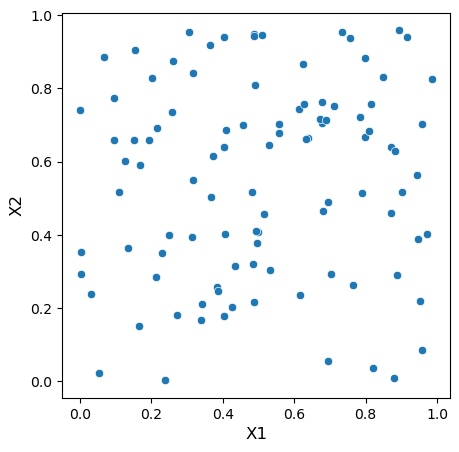

In [53]:
fig, ax = plt.subplots(figsize = ( 5 , 5 )) 
sb.scatterplot( ax = ax , x = x1b , y = x2b , data = xb ) 

ax.set_xlabel( "X1" , size = 12 ) 
ax.set_ylabel( "X2" , size = 12 ) 
 
plt.show()

Let us now generate three more normal distribution datasets to create comparisons with the first. We use different seeds in each case.

In [54]:
rng = np.random.default_rng(seed=6789)
x1c = rng.normal(size=100)
x2c = rng.normal(size=100)
xc = pd.DataFrame(x1c,x2c)

rng = np.random.default_rng(seed=9876)
x1d = rng.normal(size=100)
x2d = rng.normal(size=100)
xd = pd.DataFrame(x1d,x2d)

rng = np.random.default_rng(seed=4321)
x1e = rng.normal(size=1000)
x2e = rng.normal(size=1000)
xe = pd.DataFrame(x1e,x2e)

The next four cells produce the four scatter plots with the limits set to -4 and 4

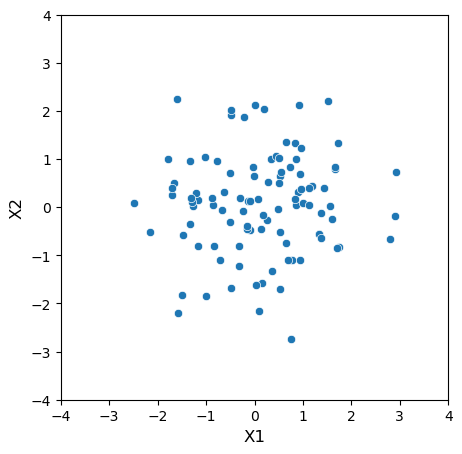

In [57]:
fig, ax = plt.subplots(figsize = ( 5 , 5 )) 
sb.scatterplot( ax = ax , x = x1a , y = x2a , data = xa ) 

ax.set_xlabel( "X1" , size = 12 ) 
ax.set_ylabel( "X2" , size = 12 ) 

ax.set_xlim(-4,4)
ax.set_ylim(-4,4)
 
plt.show()

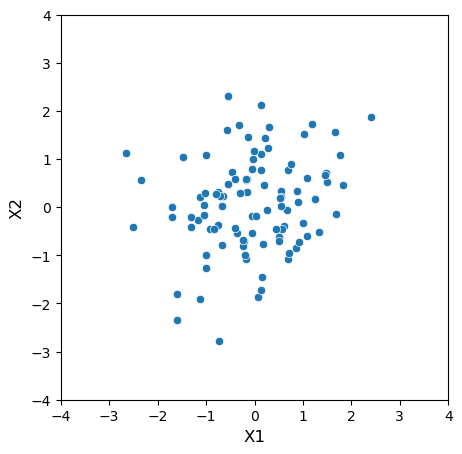

In [58]:
fig, ax = plt.subplots(figsize = ( 5 , 5 )) 
sb.scatterplot( ax = ax , x = x1c , y = x2c , data = xc ) 

ax.set_xlabel( "X1" , size = 12 ) 
ax.set_ylabel( "X2" , size = 12 ) 

ax.set_xlim(-4,4)
ax.set_ylim(-4,4)
 
plt.show()

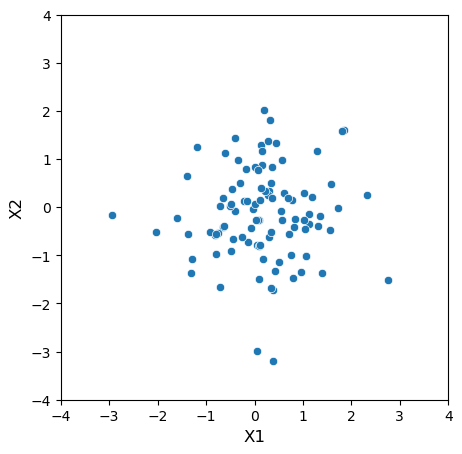

In [59]:
fig, ax = plt.subplots(figsize = ( 5 , 5 )) 
sb.scatterplot( ax = ax , x = x1d , y = x2d , data = xd ) 

ax.set_xlabel( "X1" , size = 12 ) 
ax.set_ylabel( "X2" , size = 12 ) 

ax.set_xlim(-4,4)
ax.set_ylim(-4,4)
 
plt.show()

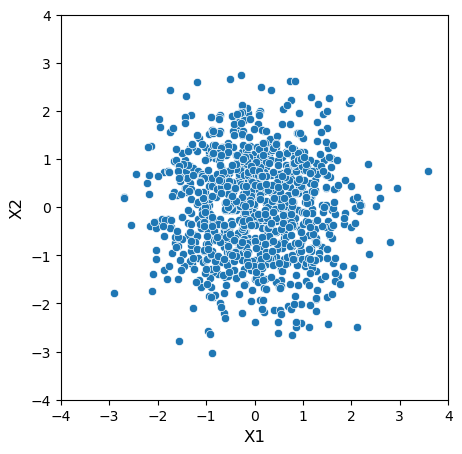

In [60]:
fig, ax = plt.subplots(figsize = ( 5 , 5 )) 
sb.scatterplot( ax = ax , x = x1e , y = x2e , data = xe ) 

ax.set_xlabel( "X1" , size = 12 ) 
ax.set_ylabel( "X2" , size = 12 ) 

ax.set_xlim(-4,4)
ax.set_ylim(-4,4)
 
plt.show()

# Considering Correlation

In this section we will look at the role of correlation. The datasets will be created with 500 data points to make the shapes clear in the scatter plots.

The code used to construct the datasets is taken from Real Python: https://realpython.com/python-random/

In [61]:
def corr2cov(p: np.ndarray, s: np.ndarray) -> np.ndarray:
    """Covariance matrix from correlation & standard deviations"""
    d = np.diag(s)
    return d @ p @ d

In [76]:
# Start with a correlation matrix and standard deviations.
# -0.90 is the correlation between A and B, and the correlation
# of a variable with itself is 1.0.
corr = np.array([[1., -0.90],
                  [-0.90, 1.]])

# Standard deviations/means of A and B, respectively
stdev = np.array([1., 1.])
mean = np.array([0,0])
cov = corr2cov(corr, stdev)

# `size` is the number of observations we will include
# (500 months, days, and so on).
xfm09 = np.random.multivariate_normal(mean=mean, cov=cov, size=500)
xfm09 = pd.DataFrame(xfm09)
xfm09.columns = ['X1','X2']

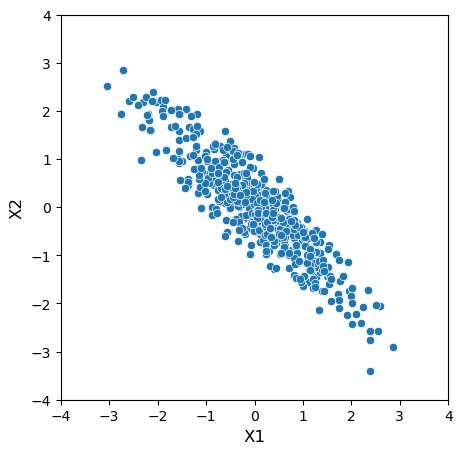

In [77]:
fig, ax = plt.subplots(figsize = ( 5 , 5 )) 
sb.scatterplot( ax = ax , x = 'X1' , y = 'X2' , data = xfm09 ) 

ax.set_xlabel( "X1" , size = 12 ) 
ax.set_ylabel( "X2" , size = 12 ) 

ax.set_xlim(-4,4)
ax.set_ylim(-4,4)
 
plt.show()

For the remaining datasets we will only change the correlation matrix and then rerun the corr2cov function. We then produce the actual dataset. (Note that this code could be effectively implemented via a loop, but we do not here so that all elements of the process are transparent)


In [103]:
corr = np.array([[1., -0.80],
                  [-0.80, 1.]])

cov = corr2cov(corr, stdev)

xfm08 = np.random.multivariate_normal(mean=mean, cov=cov, size=500)
xfm08 = pd.DataFrame(xfm08)
xfm08.columns = ['X1','X2']

# Then -0.70

corr = np.array([[1., -0.70],
                  [-0.70, 1.]])

cov = corr2cov(corr, stdev)

xfm07 = np.random.multivariate_normal(mean=mean, cov=cov, size=500)
xfm07 = pd.DataFrame(xfm07)
xfm07.columns = ['X1','X2']

# Then -0.60

corr = np.array([[1., -0.60],
                  [-0.60, 1.]])

cov = corr2cov(corr, stdev)

xfm06 = np.random.multivariate_normal(mean=mean, cov=cov, size=500)
xfm06 = pd.DataFrame(xfm06)
xfm06.columns = ['X1','X2']

# Then -0.50

corr = np.array([[1., -0.50],
                  [-0.50, 1.]])

cov = corr2cov(corr, stdev)

xfm05 = np.random.multivariate_normal(mean=mean, cov=cov, size=500)
xfm05 = pd.DataFrame(xfm05)
xfm05.columns = ['X1','X2']

# Then -0.40

corr = np.array([[1., -0.40],
                  [-0.40, 1.]])

cov = corr2cov(corr, stdev)

xfm04 = np.random.multivariate_normal(mean=mean, cov=cov, size=500)
xfm04 = pd.DataFrame(xfm04)
xfm04.columns = ['X1','X2']

# Then -0.30

corr = np.array([[1., -0.30],
                  [-0.30, 1.]])

cov = corr2cov(corr, stdev)

xfm03 = np.random.multivariate_normal(mean=mean, cov=cov, size=500)
xfm03 = pd.DataFrame(xfm03)
xfm03.columns = ['X1','X2']

# Then -0.20

corr = np.array([[1., -0.20],
                  [-0.20, 1.]])

cov = corr2cov(corr, stdev)

xfm02 = np.random.multivariate_normal(mean=mean, cov=cov, size=500)
xfm02 = pd.DataFrame(xfm02)
xfm02.columns = ['X1','X2']

# Then -0.10

corr = np.array([[1., -0.10],
                  [-0.10, 1.]])

cov = corr2cov(corr, stdev)

xfm01 = np.random.multivariate_normal(mean=mean, cov=cov, size=500)
xfm01 = pd.DataFrame(xfm01)
xfm01.columns = ['X1','X2']

# Then 0.00

corr = np.array([[1., 0.00],
                  [0.00, 1.]])

cov = corr2cov(corr, stdev)

xfp00 = np.random.multivariate_normal(mean=mean, cov=cov, size=500)
xfp00 = pd.DataFrame(xfp00)
xfp00.columns = ['X1','X2']

# Then 0.10

corr = np.array([[1., 0.10],
                  [0.10, 1.]])

cov = corr2cov(corr, stdev)

xfp01 = np.random.multivariate_normal(mean=mean, cov=cov, size=500)
xfp01 = pd.DataFrame(xfp01)
xfp01.columns = ['X1','X2']

# Then 0.10

corr = np.array([[1., 0.20],
                  [0.20, 1.]])

cov = corr2cov(corr, stdev)

xfp02 = np.random.multivariate_normal(mean=mean, cov=cov, size=500)
xfp02 = pd.DataFrame(xfp02)
xfp02.columns = ['X1','X2']

# Then 0.30

corr = np.array([[1., 0.30],
                  [0.30, 1.]])

cov = corr2cov(corr, stdev)

xfp03 = np.random.multivariate_normal(mean=mean, cov=cov, size=500)
xfp03 = pd.DataFrame(xfp03)
xfp03.columns = ['X1','X2']

# Then 0.40

corr = np.array([[1., 0.40],
                  [0.40, 1.]])

cov = corr2cov(corr, stdev)

xfp04 = np.random.multivariate_normal(mean=mean, cov=cov, size=500)
xfp04 = pd.DataFrame(xfp04)
xfp04.columns = ['X1','X2']

# Then 0.50

corr = np.array([[1., 0.50],
                  [0.50, 1.]])

cov = corr2cov(corr, stdev)

xfp05 = np.random.multivariate_normal(mean=mean, cov=cov, size=500)
xfp05 = pd.DataFrame(xfp05)
xfp05.columns = ['X1','X2']

# Then 0.60

corr = np.array([[1., 0.60],
                  [0.60, 1.]])

cov = corr2cov(corr, stdev)

xfp06 = np.random.multivariate_normal(mean=mean, cov=cov, size=500)
xfp06 = pd.DataFrame(xfp06)
xfp06.columns = ['X1','X2']

# Then 0.70

corr = np.array([[1., 0.70],
                  [0.70, 1.]])

cov = corr2cov(corr, stdev)

xfp07 = np.random.multivariate_normal(mean=mean, cov=cov, size=500)
xfp07 = pd.DataFrame(xfp07)
xfp07.columns = ['X1','X2']

# Then 0.80

corr = np.array([[1., 0.80],
                  [0.80, 1.]])

cov = corr2cov(corr, stdev)

xfp08 = np.random.multivariate_normal(mean=mean, cov=cov, size=500)
xfp08 = pd.DataFrame(xfp08)
xfp08.columns = ['X1','X2']

# Then 0.90

corr = np.array([[1., 0.90],
                  [0.90, 1.]])

cov = corr2cov(corr, stdev)

xfp09 = np.random.multivariate_normal(mean=mean, cov=cov, size=500)
xfp09 = pd.DataFrame(xfp09)
xfp09.columns = ['X1','X2']

# Then 1

corr = np.array([[1., 1.],
                  [1., 1.]])

cov = corr2cov(corr, stdev)

xfp10 = np.random.multivariate_normal(mean=mean, cov=cov, size=500)
xfp10 = pd.DataFrame(xfp10)
xfp10.columns = ['X1','X2']

For the graphs we provide a single block of code. To edit for any other value just change the sb.scatterplot() command to match with the desired data from above:

xfm09 - correlation = -0.90
xfp00 - correlation = 0.00
xfp06 - correlation = 0.60

We then save the files by clicking on them and using save as...


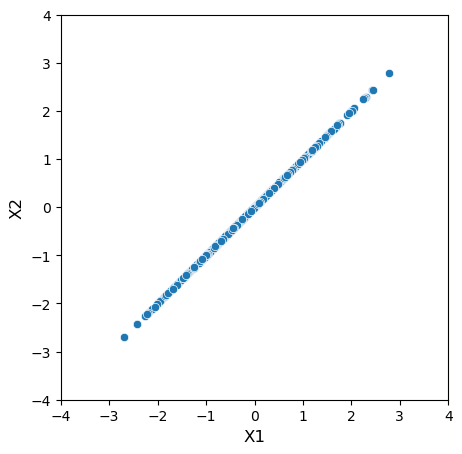

In [104]:
fig, ax = plt.subplots(figsize = ( 5 , 5 )) 
sb.scatterplot( ax = ax , x = 'X1' , y = 'X2' , data = xfp10 ) 

ax.set_xlabel( "X1" , size = 12 ) 
ax.set_ylabel( "X2" , size = 12 ) 

ax.set_xlim(-4,4)
ax.set_ylim(-4,4)
 
plt.show()

# Adding Dummy Characteristics

We will create two dummies for Dataset A based upon conditions on the X1 and X2 values. Initially this will mean that all points which satisfy the condition have 1 as the characteristic value.

Python does permit a random condition argument should we wish to make the data more interesting. However, this example is for illustration only.

We will work with the dataset xfp03 in this example.

In [131]:
xfp03['dummy1'] = ((xfp03['X1']>=1) & (xfp03['X1']<2) & (xfp03['X2']>=1) & (xfp03['X2']<2))*1
xfp03['dummy2'] = ((xfp03['X1']>=-2) & (xfp03['X1']<-1) & (xfp03['X2']>=-2) & (xfp03['X2']<-1))*1

In [132]:
xfp03.head()

,X1,X2,dummy1,dummy2
0,-0.418249,-0.440619,0,0
1,-0.432904,-0.604431,0,0
2,1.509705,-0.044763,0,0
3,0.955823,0.771169,0,0
4,0.119042,2.656133,0,0


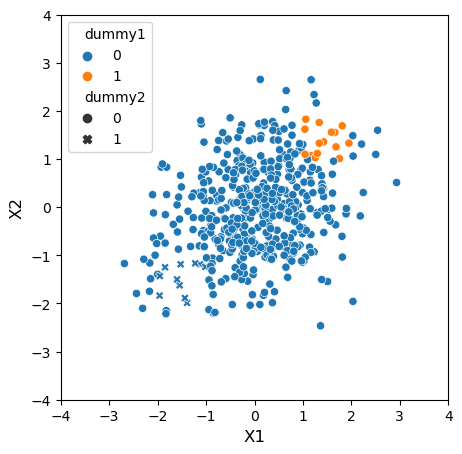

In [136]:
fig, ax = plt.subplots(figsize = ( 5 , 5 )) 
sb.scatterplot( ax = ax , x = 'X1' , y = 'X2' , data = xfp03 , hue="dummy1",style="dummy2") 

ax.set_xlabel( "X1" , size = 12 ) 
ax.set_ylabel( "X2" , size = 12 ) 

ax.set_xlim(-4,4)
ax.set_ylim(-4,4)
 
plt.show()

We can go further by creating a size variable to change the size of the points. Let us use the absolute value of X1 to obtain the size

In [137]:
xfp03['absX1'] = abs(xfp03['X1'])

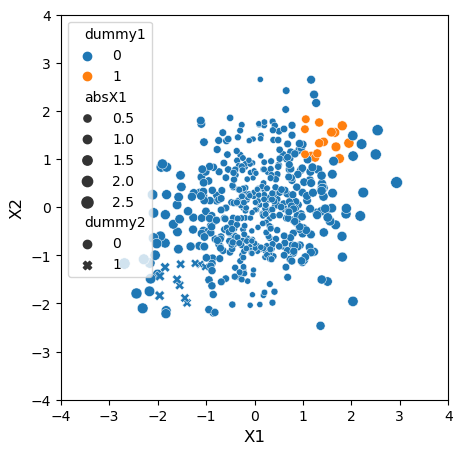

In [138]:
fig, ax = plt.subplots(figsize = ( 5 , 5 )) 
sb.scatterplot( ax = ax , x = 'X1' , y = 'X2' , data = xfp03 , hue="dummy1",style="dummy2", size="absX1") 

ax.set_xlabel( "X1" , size = 12 ) 
ax.set_ylabel( "X2" , size = 12 ) 

ax.set_xlim(-4,4)
ax.set_ylim(-4,4)
 
plt.show()

# Distributions

The two artificial data sets are constructed to have specific distributions. Data set A is taken from the normal distribution, whilst data set B comes from a uniform distribution. We can plot these distributions using Seaborn

/Users/wanlingrudkin/anaconda3/lib/python3.11/site-packages/seaborn/axisgrid.py:118: UserWarning: The figure layout has changed to tight
  self._figure.tight_layout(*args, **kwargs)


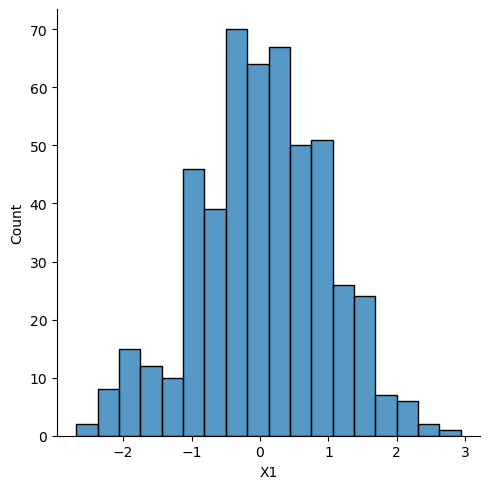

In [142]:
sb.displot(xfp03, x='X1')

/Users/wanlingrudkin/anaconda3/lib/python3.11/site-packages/seaborn/axisgrid.py:118: UserWarning: The figure layout has changed to tight
  self._figure.tight_layout(*args, **kwargs)


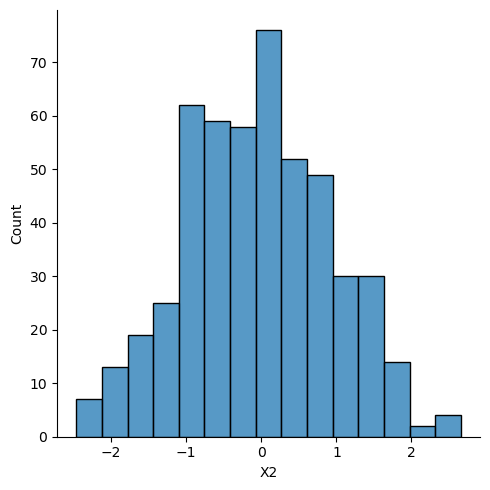

In [143]:
sb.displot(xfp03, x='X2')

/Users/wanlingrudkin/anaconda3/lib/python3.11/site-packages/seaborn/axisgrid.py:118: UserWarning: The figure layout has changed to tight
  self._figure.tight_layout(*args, **kwargs)


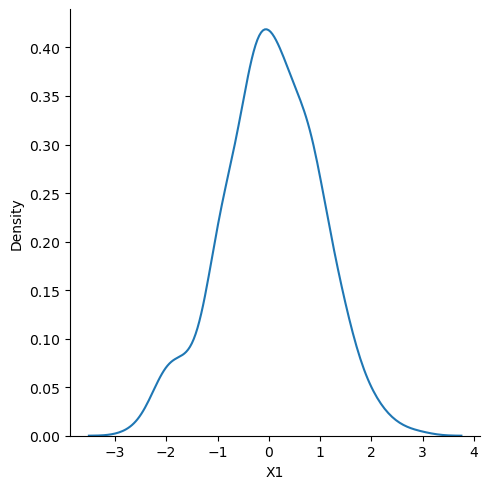

In [145]:
sb.displot(xfp03, x='X1', kind="kde")

/Users/wanlingrudkin/anaconda3/lib/python3.11/site-packages/seaborn/axisgrid.py:118: UserWarning: The figure layout has changed to tight
  self._figure.tight_layout(*args, **kwargs)


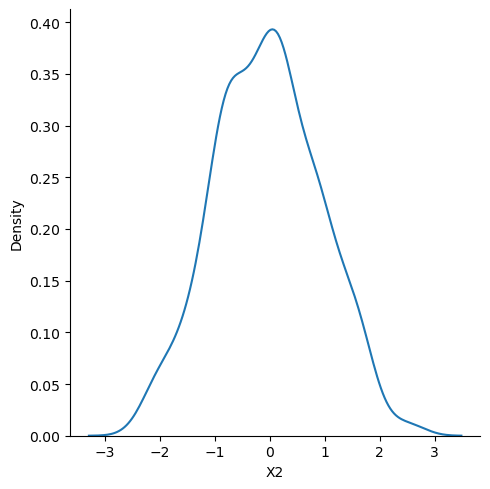

In [146]:
sb.displot(xfp03, x='X2', kind="kde")

We may also produce bivariate distributions with contours and heatmaps. Again we will produce these for the dataset in which there is a correlation of 0.3 between X1 and X2

/Users/wanlingrudkin/anaconda3/lib/python3.11/site-packages/seaborn/axisgrid.py:118: UserWarning: The figure layout has changed to tight
  self._figure.tight_layout(*args, **kwargs)


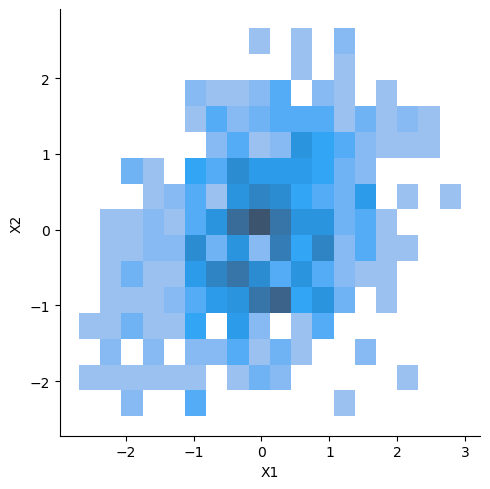

In [148]:
sb.displot(xfp03, x="X1", y="X2")

/Users/wanlingrudkin/anaconda3/lib/python3.11/site-packages/seaborn/axisgrid.py:118: UserWarning: The figure layout has changed to tight
  self._figure.tight_layout(*args, **kwargs)


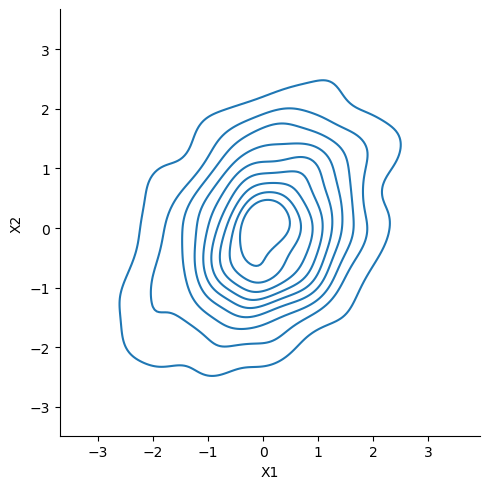

In [149]:
sb.displot(xfp03, x="X1", y="X2", kind="kde")